In [1]:
import pandas as pd
import numpy as np

from surprise import NormalPredictor
from surprise import SVD
from surprise import SlopeOne
from surprise import Dataset
from surprise import Reader
from surprise.model_selection.split import KFold, train_test_split
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, BaselineOnly, CoClustering, SVD, SVDpp
from sklearn.metrics import mean_squared_error as rmse
from sklearn import pipeline

import matplotlib.pyplot as plt

# set random state for reproducibility
kwargs = dict(random_state=42)

Documentary of scikit-suprise can be found under https://surprise.readthedocs.io/en/stable/

In [2]:
ratings = pd.read_csv('../../data/preprocessed/ratings_clean_std_0.csv', sep=',').drop(columns={'Unnamed: 0'})

In [3]:
ratings

,user_id,imdbID,rating
0,1264,tt0047034,3.5
1,213,tt0304141,2.5
2,593,tt0369436,3.0
3,609,tt1077258,4.0
4,1590,tt0052182,4.0
...,...,...,...
787536,1032,tt0083530,3.0
787537,99,tt0107798,3.0
787538,333,tt0093857,3.0
787539,49,tt0144168,3.0


In [4]:
# build a reader, define the rating scale (minimum and maximum value)
reader = Reader(rating_scale=(0.5, 5))

# The columns must be in the order of user id, item id and ratings 
data = Dataset.load_from_df(ratings[['user_id', 'imdbID', 'rating']], reader)

In [5]:
test = KFold(**kwargs)

In [9]:
def compare_weights(algos):
    i=0
    rmses = []
    for trainset, testset in KFold(**kwargs).split(data):
        preds = []
        for algo in algos:
            algo.fit(trainset)
            preds.append([algo.predict(uid, iid).est for uid, iid,_ in testset])
        preds = np.asarray(preds).T
        actuals = np.asarray([r[2] for r in testset])
        ws = np.arange(0, 1.001, 0.01)
        rmses.append([rmse(actuals, preds.dot((w, 1 - w)), squared=False) for w in ws])
    return rmses            

In [10]:
# define collaborative filtering models: KNN and SVD
algos = (KNNWithZScore(k=125, min_k=10, sim_options={'name':'msd', 'user_based': False}, **kwargs), SVD(lr_all=0.01, reg_all=0.05, n_epochs=22, **kwargs))

In [11]:
ow_est = compare_weights(algos)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [16]:
len(ow_est)

5

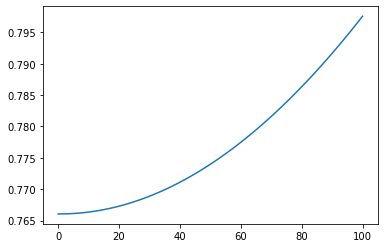

In [43]:
plt.plot(ow_est[0])

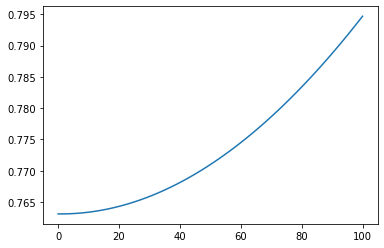

In [18]:
plt.plot(ow_est[1])

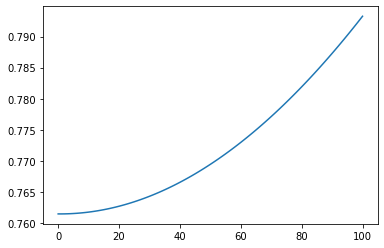

In [19]:
plt.plot(ow_est[2])

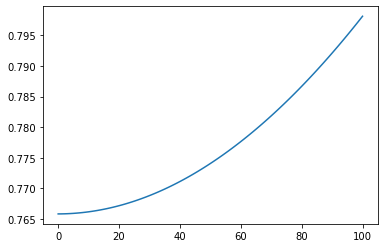

In [20]:
plt.plot(ow_est[3])

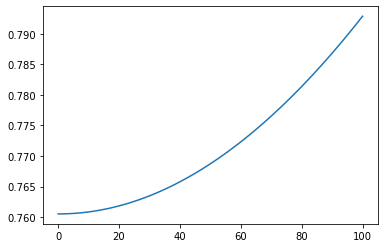

In [21]:
plt.plot(ow_est[4])